##### 크롤링

In [20]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time
from collections import Counter
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#(빈)크롬창 열기
driver = webdriver.Chrome(ChromeDriverManager().install())

#네이버 지식인: 강아지홈캠
driver.get("https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%EA%B0%95%EC%95%84%EC%A7%80%ED%99%88%EC%BA%A0")
driver.maximize_window()
time.sleep(3)

#옵션 클릭
opt = driver.find_element_by_css_selector('#snb > div.api_group_option_filter._search_option_simple_wrap > div > div.option_filter > a')
opt.click()
time.sleep(1)

#6개월 클릭
choice = driver.find_element_by_css_selector('#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a.txt._calendar_select_trigger')
choice.click()

year = driver.find_element_by_css_selector('#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(1) > div > div > div > ul > li:nth-child(14) > a')
year.click()

#month=
#month.click()
#day=
#day.click()

choice2=driver.find_element_by_css_selector('#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.btn_area > button')
choice2.click()

all_contents_list=[]
while True:
    try:
        for i in range(1, 11):
            list = driver.find_element_by_css_selector(f"#main_pack > section.sc_new.sp_nkin._au_kin_collection > div > ul > li:nth-child({i}) > div > div.question_area > div.question_group > a")
            list.click()
            #time.sleep(1)
            
            driver.switch_to.window(driver.window_handles[1])
            #time.sleep(1)
                                                               
            #제목이랑 내용 함께 추출하고 싶을 때                                   
            all_contents=driver.find_elements_by_css_selector('#content > div.question-content > div')
            for j in all_contents:                              
                all_contents_list.append(j.text)
            #time.sleep(1)
            
            driver.close()
            #time.sleep(1)
            driver.switch_to.window(driver.window_handles[0])

                                                    
        next = driver.find_element_by_css_selector("#main_pack > div.api_sc_page_wrap > div > a.btn_next")
        next.click()

    except:
        break

In [21]:
len(all_contents_list)

262

##### 텍스트 정제하기 with 정규표현식

In [22]:
#형태소 분석기를 통해 텍스트 정제하기
from konlpy.tag import Okt
okt=Okt()
import re

#필요없는 표시들 지우기
result_list =[]
for i in all_contents_list:
    result = i.replace("\n", "")
    result = result.replace('질문', '')
    result = result.replace('?', '')
    result = result.replace('나눈', '')
    result = result.replace('내공', '')
    result = result.replace('[', '')
    result = result.replace(']', '')
    result = result.replace('^', '')
    result = re.sub('ㅠ|ㅜ|ㅎ|ㅋ|ㅇ|!|~', '', result)
    
    #        정규표현식
    result = re.compile("태그\s디렉터리.+").sub("", result)
    result = re.compile("[a-zA-Z0-9]").sub("", result)
    result_list.append(result)

result_list

['홈캠/강아지  추천좀 부탁해요집에 강아지를 혼자두고 직장생활을 하게되서 홈캠을 설치할까 생각하고 인터넷으로 알아봤는데종류가 너무 다양해서 멀로해야할지.가격대비 성능 스마트폰 연결 화질 등등 갠찮은것좀 사용해보신분 추천좀 해주세요부탁해요',
 '강아지 홈캠 목소리강아지 홈캠 설치했는데목소리를 종종 들려주면 쳐다보는데애들이 더 힘들고 불안해하는건 아니겠죠안정감을 느낄가요',
 '홈캠 써보려고 하는데 어떤가요얼마 전에 아기 강아지를 분양 받아 왔는데제가 직장인이다 보니까 하루종일 집에 있을 수가 없네요홈캠 이라도 설치해서 강아지 잘 있나 확인해야안심을 할 수 있을 것 같아서요.홈캠 설치해볼까 하는데 괜찮은거 있을까요',
 '강아지 홈캠 샤오미 미지아 좋나요 월정액 그런거 없죠홈캠은 한번도 안써봐서 모르겟네요',
 '홈캠만 있으면 강아지 혼자 오래 있어도 양호강아지가 집에 혼자 오래 있어도 홈캠이 있으면 괜찮나요 핸드폰으로 강아지가 집에서 뭐하는지 수시로 볼 수 있고 말할 수도 있잖아요 강아지한테',
 '강아지가 걱정되서 홈캠 구매하려고 하는데 어떤가요강아지를 분양 받은지 얼마 안됬는데제가 잠깐 외출할때나 자리 비울때 뭐하는지 궁금하기도 하고걱정되기도 해서 홈캠 설치해보고 싶은데 홈캠 저렴하고 좋은거 있을까요',
 '자취생 강아지 홈캠 설치하기안녕하세요 자취생입니다.강아지랑 둘이 같이 살고 있습니다.집에서 도 안보고 해서 애초에 인터넷 이런것 신청한게 하나도 없습니다.이번에 강아지 홈캠을 사용하려고 하는데 홈캠은 와이파이가 필요하다고 하네요.와이파이 공유기 구매해서 홈캠이랑 연결하면 되는건가요아님 인터넷 설치를 해야 하는 걸까요 홈캠외에는 티비 사용 이런것 아예 안합니다.와이파이 설치하면 핸드폰/노트북/홈캠 정도 연결해서 사용 할 것 같아요.홈캠 월정액이 만원이상이라서.. 금액이 애매하게 부담되기도 하고 샤오미 홈캠이랑 아이피타임 와이파이공유기 구매할까 생각 중인데어떻게 하는게 맞는건가요.. 알려주세요',
 '홈캠 인터넷 메가집에 인터넷이 안되서 이번에 인터넷을설

##### 데이터타입: 리스트를 스트링으로 변환시켜주기

In [23]:
str = ''.join(result_list)
type(result_list), type(str)

(list, str)

##### 워드클라우드-명사편

In [45]:
#불용어 지우기
stopwords=['때', '제', '것', '정도', '좀', '추천', '요', '분', '거', '후', '저희', '안', '살', '저', '마리', '보고', '지금', '산책', '소리', '계속', '사람', '생각', '훈련', '카메라', '방법']

#명사
def extract_tag(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Noun']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

#데이터타입 변경해준 result_list를 함수에 대입
text_data = extract_tag(str)

#빈도수 세기
count_n = Counter(text_data)

#빈출 단어 뽑기
count_n.most_common(20)

[('강아지', 538),
 ('집', 426),
 ('홈캠', 219),
 ('혼자', 182),
 ('시간', 134),
 ('설치', 131),
 ('분리', 111),
 ('불안', 94),
 ('걱정', 61),
 ('출근', 52),
 ('배변', 52),
 ('간식', 48),
 ('사용', 46),
 ('더', 46),
 ('고양이', 46),
 ('일', 46),
 ('전', 45),
 ('곳', 45),
 ('개월', 45),
 ('중', 44)]

#이미지를 불러올 수 있는 라이브러리 추가 실행
from PIL import Image

#이미지 불러오기
mask_image = Image.open(r"C:\Users\user\Desktop\귀.png")

#받아온 이미지 행렬화: np.array
mask_image = np.array(Image.open(r"C:\Users\user\Desktop\귀.png"))


<function matplotlib.pyplot.show(close=None, block=None)>

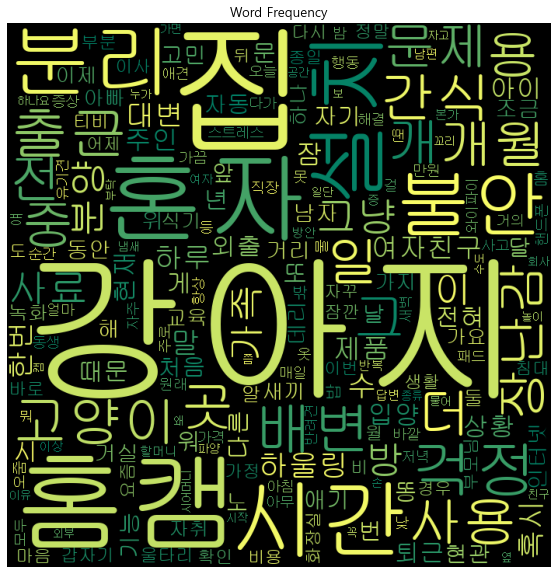

In [46]:
#워드클라우드 import
from wordcloud import WordCloud

#워드를 카운팅해주는 라이브러리
from collections import Counter

#데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                     colormap = 'summer', random_state =1).generate_from_frequencies(count_n)

#빈출단어 시각화
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show

##### 파이차트-명사편

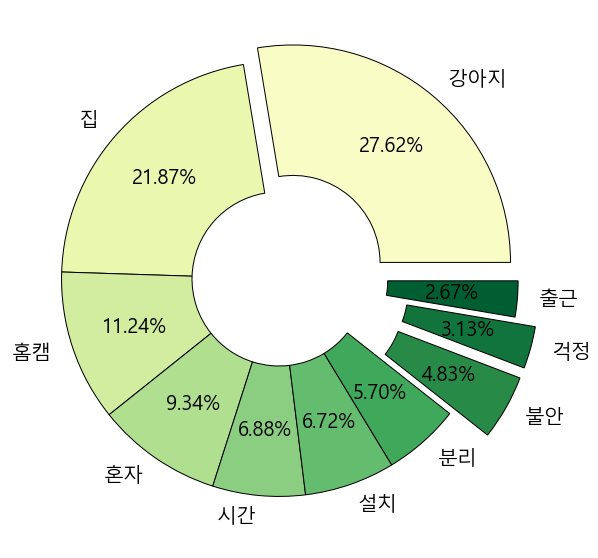

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n=count_n.most_common(10)
n

df = pd.DataFrame(n, columns=['명사', '빈도수'])
wedgeprops={'width' : 0.6, 'edgecolor' : 'black', 'linewidth' : 1}
plt.figure(figsize=(10, 10))
colors=sns.color_palette('YlGn', len(df['명사']))
plt.pie(df['빈도수'], labels = df['명사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)

plt.show()

##### 워드클라우드-동사편

In [14]:
#불용어 지우기
stopwords=[]

#동사
def extract_tag2(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Verb']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

text_data = extract_tag2(str)

#빈도수 세기
count_v = Counter(text_data)

#빈출 단어 뽑기
v=count_v.most_common(20)
v

[('하다', 2708),
 ('되다', 538),
 ('받다', 482),
 ('들다', 298),
 ('알아보다', 242),
 ('보다', 212),
 ('알다', 190),
 ('오다', 167),
 ('싶다', 167),
 ('않다', 159),
 ('가다', 152),
 ('먹다', 134),
 ('자다', 126),
 ('걸리다', 119),
 ('해보다', 117),
 ('모르다', 115),
 ('해주다', 112),
 ('드리다', 111),
 ('나오다', 111),
 ('대다', 109)]

<function matplotlib.pyplot.show(close=None, block=None)>

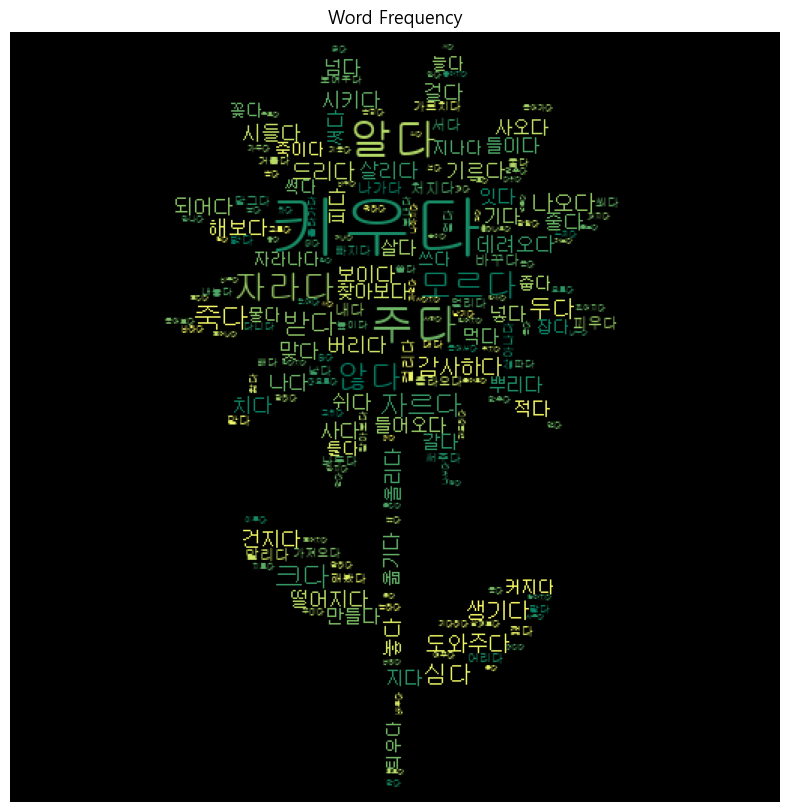

In [ ]:
#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                       mask = mask_image, colormap = 'summer', random_state =1).generate_from_frequencies(count_v)

#빈출단어 시각화
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show

##### 파이차트-동사편

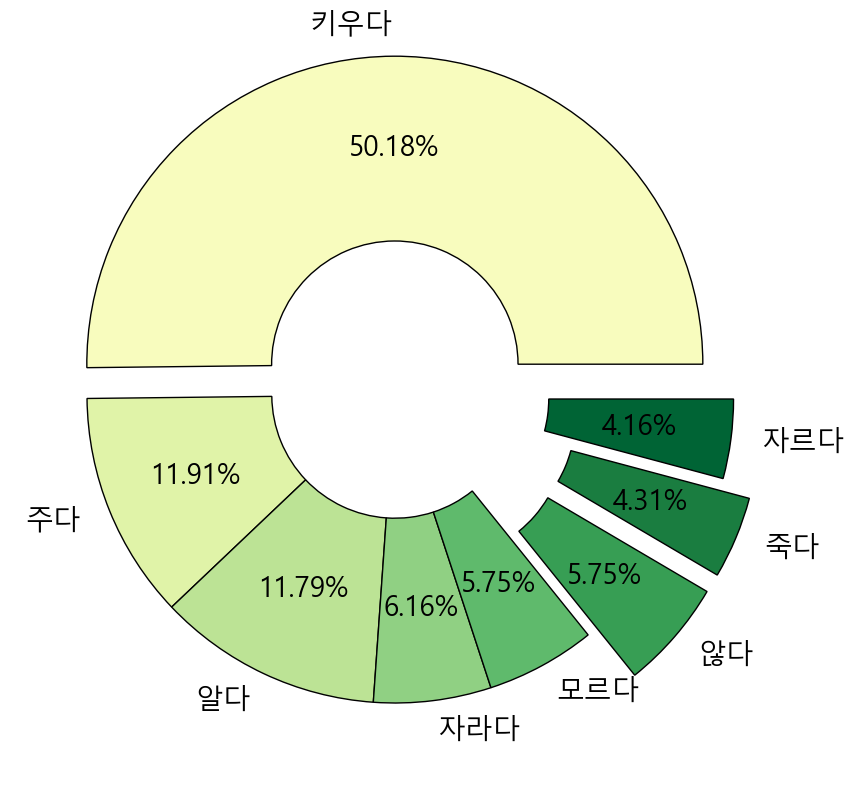

<Figure size 640x480 with 0 Axes>

In [ ]:
v=count_v.most_common(8)

df = pd.DataFrame(v, columns=['동사', '빈도수'])

colors=sns.color_palette('YlGn', len(df['동사']))

plt.figure(figsize=(10, 10))

plt.pie(df['빈도수'], labels = df['동사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)


plt.show()
plt.savefig('verb_pie.png')